In [1]:
!pip install matplotlib

In [2]:
from google.colab import files
uploaded = files.upload()

Saving VNM.csv to VNM.csv


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [4]:
df = pd.read_csv("VNM.csv")
df

,Date,Price,Open,High,Low,Vol.,Change %
0,3/1/2019,"110,654.00","112,611.00","112,611.00","110,654.00",1.04M,0.21%
1,3/4/2019,"111,828.00","110,732.00","112,611.00","110,732.00",1.05M,1.06%
2,3/5/2019,"111,124.00","111,515.00","111,750.00","110,811.00",639.01K,-0.63%
3,3/6/2019,"110,341.00","111,124.00","111,750.00","108,385.00",853.50K,-0.70%
4,3/7/2019,"109,324.00","110,576.00","111,124.00","109,167.00",849.60K,-0.92%
...,...,...,...,...,...,...,...
1310,5/29/2024,"66,300.00","67,000.00","67,300.00","66,000.00",3.36M,-0.75%
1311,5/30/2024,"65,700.00","66,100.00","66,200.00","65,500.00",4.41M,-0.90%
1312,5/31/2024,"65,400.00","65,900.00","65,900.00","65,300.00",4.14M,-0.46%
1313,6/3/2024,"66,100.00","65,800.00","66,600.00","65,700.00",3.19M,1.07%


In [5]:
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
df['Date'] = pd.to_datetime(df['Date'])
df["Price"] = df["Price"].str.replace(',', '').astype(float)
df

,Date,Price,Open,High,Low,Vol.,Change %
0,2019-03-01,110654.0,"112,611.00","112,611.00","110,654.00",1.04M,0.21%
1,2019-03-04,111828.0,"110,732.00","112,611.00","110,732.00",1.05M,1.06%
2,2019-03-05,111124.0,"111,515.00","111,750.00","110,811.00",639.01K,-0.63%
3,2019-03-06,110341.0,"111,124.00","111,750.00","108,385.00",853.50K,-0.70%
4,2019-03-07,109324.0,"110,576.00","111,124.00","109,167.00",849.60K,-0.92%
...,...,...,...,...,...,...,...
1310,2024-05-29,66300.0,"67,000.00","67,300.00","66,000.00",3.36M,-0.75%
1311,2024-05-30,65700.0,"66,100.00","66,200.00","65,500.00",4.41M,-0.90%
1312,2024-05-31,65400.0,"65,900.00","65,900.00","65,300.00",4.14M,-0.46%
1313,2024-06-03,66100.0,"65,800.00","66,600.00","65,700.00",3.19M,1.07%


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1315 entries, 0 to 1314
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1315 non-null   datetime64[ns]
 1   Price     1315 non-null   float64       
 2   Open      1315 non-null   object        
 3   High      1315 non-null   object        
 4   Low       1315 non-null   object        
 5   Vol.      1315 non-null   object        
 6   Change %  1315 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 72.0+ KB


<h1>Split the data into training, testing arcording to 7:3


In [7]:
train_size = int(0.7 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [8]:
#Qua trinh Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])


In [9]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [10]:
#Qua trinh Testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

In [11]:
# Create index for the next 30, 60, and 90 days
index_30_days = pd.RangeIndex(start=len(df), stop=len(df) + 30)
index_60_days = pd.RangeIndex(start=len(df) + 30, stop=len(df) + 60)
index_90_days = pd.RangeIndex(start=len(df) + 60, stop=len(df) + 90)

# Extract the closing price of the last day
last_day_close = df.iloc[-1]['Price']

# Create feature arrays for the next 30, 60, and 90 days
features_30_days = np.repeat(last_day_close, 30)
features_60_days = np.repeat(last_day_close, 30)
features_90_days = np.repeat(last_day_close, 30)

# Predict the closing prices for the next 30, 60, and 90 days
predictions_30_days = model.predict(features_30_days.reshape(-1, 1))
predictions_60_days = model.predict(features_60_days.reshape(-1, 1))
predictions_90_days = model.predict(features_90_days.reshape(-1, 1))

# Create a dataframe to store the predicted prices with the new index
predicted_30_days_df = pd.DataFrame(predictions_30_days, index=index_30_days, columns=['Predicted Close'])
predicted_60_days_df = pd.DataFrame(predictions_60_days, index=index_60_days, columns=['Predicted Close'])
predicted_90_days_df = pd.DataFrame(predictions_90_days, index=index_90_days, columns=['Predicted Close'])

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(predicted_30_days_df)

# Print the predicted closing prices for the next 60 and 90 days
print('Predicted closing prices for the next 60 days:')
print(predicted_60_days_df)

print('Predicted closing prices for the next 90 days:')
print(predicted_90_days_df)

Predicted closing prices for the next 30 days:
      Predicted Close
1315          72999.0
1316          72999.0
1317          72999.0
1318          72999.0
1319          72999.0
1320          72999.0
1321          72999.0
1322          72999.0
1323          72999.0
1324          72999.0
1325          72999.0
1326          72999.0
1327          72999.0
1328          72999.0
1329          72999.0
1330          72999.0
1331          72999.0
1332          72999.0
1333          72999.0
1334          72999.0
1335          72999.0
1336          72999.0
1337          72999.0
1338          72999.0
1339          72999.0
1340          72999.0
1341          72999.0
1342          72999.0
1343          72999.0
1344          72999.0
Predicted closing prices for the next 60 days:
      Predicted Close
1345          72999.0
1346          72999.0
1347          72999.0
1348          72999.0
1349          72999.0
1350          72999.0
1351          72999.0
1352          72999.0
1353          72999.0
1354

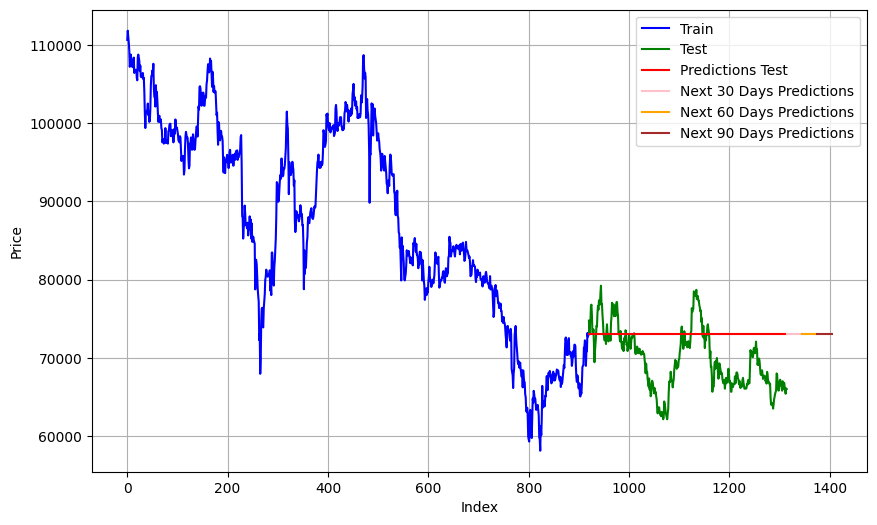

In [12]:
#Vẽ hình
plt.figure(figsize=(10, 6))
plt.plot(x_train, y_train, color='blue', label='Train')
plt.plot(x_test, y_test, color='green', label='Test')
plt.plot(x_test, y_pred, color='red', label='Predictions Test')
plt.plot(predicted_30_days_df, color='pink', label='Next 30 Days Predictions')
plt.plot(predicted_60_days_df, color='orange', label='Next 60 Days Predictions')
plt.plot(predicted_90_days_df, color='brown', label='Next 90 Days Predictions')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
#Tính RMSE, MAE, MAPE
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

test_mse = mean_squared_error(y_test, y_pred)

test_rmse = np.sqrt(test_mse)

test_mae = mean_absolute_error(y_test, y_pred)

test_mape = mean_absolute_percentage_error(y_test, y_pred)*100

print('Testing RMSE:', test_rmse)
print('Testing MAE:', test_mae)
print('Testing MAPE:', test_mape)

Testing RMSE: 5037.9927044232645
Testing MAE: 4219.426329113857
Testing MAPE: 6.235217353721297


<h1># Split the data into training, testing arcording to 8:2

In [15]:
train_size = int(0.8 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [16]:
#Qua trinh Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])


In [17]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [18]:
#Qua trinh Testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

In [19]:
# Create index for the next 30, 60, and 90 days
index_30_days = pd.RangeIndex(start=len(df), stop=len(df) + 30)
index_60_days = pd.RangeIndex(start=len(df) + 30, stop=len(df) + 60)
index_90_days = pd.RangeIndex(start=len(df) + 60, stop=len(df) + 90)

# Extract the closing price of the last day
last_day_close = df.iloc[-1]['Price']

# Create feature arrays for the next 30, 60, and 90 days
features_30_days = np.repeat(last_day_close, 30)
features_60_days = np.repeat(last_day_close, 30)
features_90_days = np.repeat(last_day_close, 30)

# Predict the closing prices for the next 30, 60, and 90 days
predictions_30_days = model.predict(features_30_days.reshape(-1, 1))
predictions_60_days = model.predict(features_60_days.reshape(-1, 1))
predictions_90_days = model.predict(features_90_days.reshape(-1, 1))

# Create a dataframe to store the predicted prices with the new index
predicted_30_days_df = pd.DataFrame(predictions_30_days, index=index_30_days, columns=['Predicted Close'])
predicted_60_days_df = pd.DataFrame(predictions_60_days, index=index_60_days, columns=['Predicted Close'])
predicted_90_days_df = pd.DataFrame(predictions_90_days, index=index_90_days, columns=['Predicted Close'])

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(predicted_30_days_df)

# Print the predicted closing prices for the next 60 and 90 days
print('Predicted closing prices for the next 60 days:')
print(predicted_60_days_df)

print('Predicted closing prices for the next 90 days:')
print(predicted_90_days_df)

Predicted closing prices for the next 30 days:
      Predicted Close
1315        65981.587
1316        65981.587
1317        65981.587
1318        65981.587
1319        65981.587
1320        65981.587
1321        65981.587
1322        65981.587
1323        65981.587
1324        65981.587
1325        65981.587
1326        65981.587
1327        65981.587
1328        65981.587
1329        65981.587
1330        65981.587
1331        65981.587
1332        65981.587
1333        65981.587
1334        65981.587
1335        65981.587
1336        65981.587
1337        65981.587
1338        65981.587
1339        65981.587
1340        65981.587
1341        65981.587
1342        65981.587
1343        65981.587
1344        65981.587
Predicted closing prices for the next 60 days:
      Predicted Close
1345        65981.587
1346        65981.587
1347        65981.587
1348        65981.587
1349        65981.587
1350        65981.587
1351        65981.587
1352        65981.587
1353        65981.587
1354

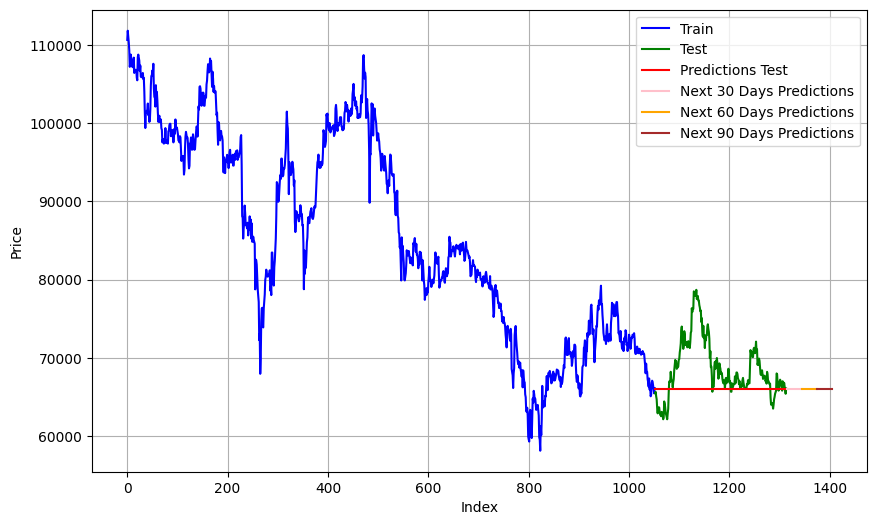

In [20]:
#Vẽ hình
plt.figure(figsize=(10, 6))
plt.plot(x_train, y_train, color='blue', label='Train')
plt.plot(x_test, y_test, color='green', label='Test')
plt.plot(x_test, y_pred, color='red', label='Predictions Test')
plt.plot(predicted_30_days_df, color='pink', label='Next 30 Days Predictions')
plt.plot(predicted_60_days_df, color='orange', label='Next 60 Days Predictions')
plt.plot(predicted_90_days_df, color='brown', label='Next 90 Days Predictions')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
#Tính RMSE, MAE, MAPE
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

test_mse = mean_squared_error(y_test, y_pred)

test_rmse = np.sqrt(test_mse)

test_mae = mean_absolute_error(y_test, y_pred)

test_mape = mean_absolute_percentage_error(y_test, y_pred)*100

print('Testing RMSE:', test_rmse)
print('Testing MAE:', test_mae)
print('Testing MAPE:', test_mape)

Testing RMSE: 4501.739761676957
Testing MAE: 3273.0684296577956
Testing MAPE: 4.587343957458773


<h1>Split the data into training, testing arcording to 9:1

In [23]:
train_size = int(0.9 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [24]:
#Qua trinh Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

In [25]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [26]:
#Qua trinh Testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

In [27]:
# Create index for the next 30, 60, and 90 days
index_30_days = pd.RangeIndex(start=len(df), stop=len(df) + 30)
index_60_days = pd.RangeIndex(start=len(df) + 30, stop=len(df) + 60)
index_90_days = pd.RangeIndex(start=len(df) + 60, stop=len(df) + 90)

# Extract the closing price of the last day
last_day_close = df.iloc[-1]['Price']

# Create feature arrays for the next 30, 60, and 90 days
features_30_days = np.repeat(last_day_close, 30)
features_60_days = np.repeat(last_day_close, 30)
features_90_days = np.repeat(last_day_close, 30)

# Predict the closing prices for the next 30, 60, and 90 days
predictions_30_days = model.predict(features_30_days.reshape(-1, 1))
predictions_60_days = model.predict(features_60_days.reshape(-1, 1))
predictions_90_days = model.predict(features_90_days.reshape(-1, 1))

# Create a dataframe to store the predicted prices with the new index
predicted_30_days_df = pd.DataFrame(predictions_30_days, index=index_30_days, columns=['Predicted Close'])
predicted_60_days_df = pd.DataFrame(predictions_60_days, index=index_60_days, columns=['Predicted Close'])
predicted_90_days_df = pd.DataFrame(predictions_90_days, index=index_90_days, columns=['Predicted Close'])

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(predicted_30_days_df)

# Print the predicted closing prices for the next 60 and 90 days
print('Predicted closing prices for the next 60 days:')
print(predicted_60_days_df)

print('Predicted closing prices for the next 90 days:')
print(predicted_90_days_df)

Predicted closing prices for the next 30 days:
      Predicted Close
1315        68692.284
1316        68692.284
1317        68692.284
1318        68692.284
1319        68692.284
1320        68692.284
1321        68692.284
1322        68692.284
1323        68692.284
1324        68692.284
1325        68692.284
1326        68692.284
1327        68692.284
1328        68692.284
1329        68692.284
1330        68692.284
1331        68692.284
1332        68692.284
1333        68692.284
1334        68692.284
1335        68692.284
1336        68692.284
1337        68692.284
1338        68692.284
1339        68692.284
1340        68692.284
1341        68692.284
1342        68692.284
1343        68692.284
1344        68692.284
Predicted closing prices for the next 60 days:
      Predicted Close
1345        68692.284
1346        68692.284
1347        68692.284
1348        68692.284
1349        68692.284
1350        68692.284
1351        68692.284
1352        68692.284
1353        68692.284
1354

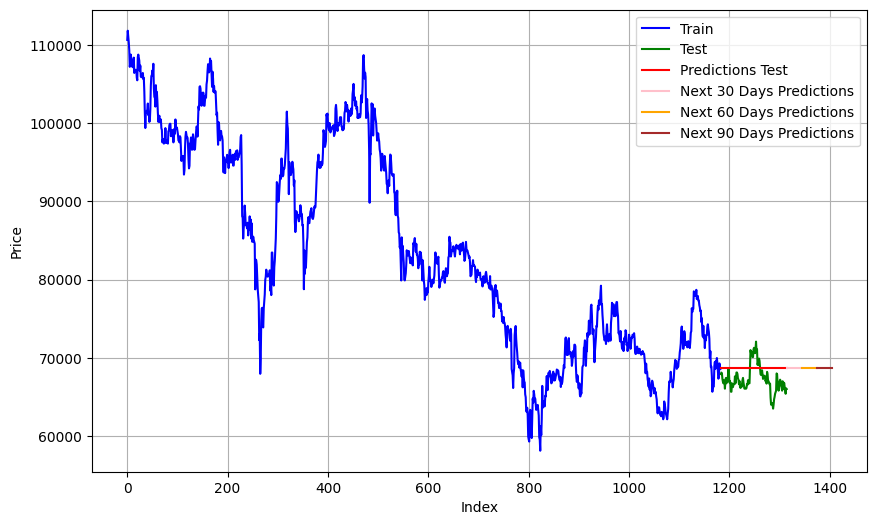

In [29]:
#Vẽ hình
plt.figure(figsize=(10, 6))
plt.plot(x_train, y_train, color='blue', label='Train')
plt.plot(x_test, y_test, color='green', label='Test')
plt.plot(x_test, y_pred, color='red', label='Predictions Test')
plt.plot(predicted_30_days_df, color='pink', label='Next 30 Days Predictions')
plt.plot(predicted_60_days_df, color='orange', label='Next 60 Days Predictions')
plt.plot(predicted_90_days_df, color='brown', label='Next 90 Days Predictions')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
#Tính RMSE, MAE, MAPE
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

test_mse = mean_squared_error(y_test, y_pred)

test_rmse = np.sqrt(test_mse)

test_mae = mean_absolute_error(y_test, y_pred)

test_mape = mean_absolute_percentage_error(y_test, y_pred)*100

print('Testing RMSE:', test_rmse)
print('Testing MAE:', test_mae)
print('Testing MAPE:', test_mape)

Testing RMSE: 2192.0711563424334
Testing MAE: 1952.689090909169
Testing MAPE: 2.925825327938981
